# 1. Scikit-learn
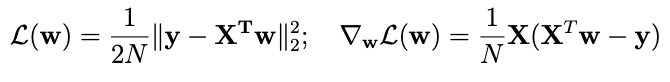

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

In [4]:
# create 500data near y = 4 + 3x
X = np.random.random(500)
y = 4 + 3*X + .5*np.random.random(500)

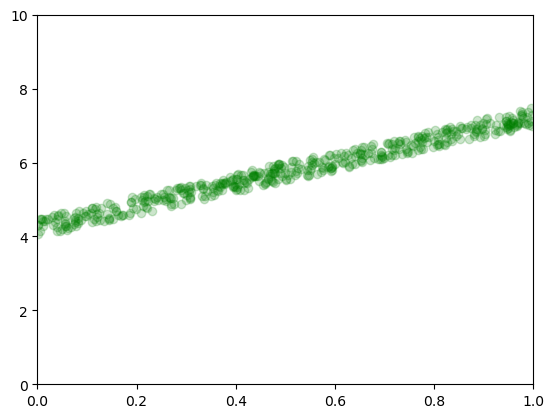

In [5]:
# alpha: transparent ratio
plt.scatter(X,y, color = 'green', alpha = 0.2)
plt.axis([0,1,0,10])
plt.show()

In [6]:
lr = LinearRegression()
lr.fit(X.reshape(-1,1), y.reshape(-1,1))

LinearRegression()

* The “slope” parameters (w), also called weights or coefficients, are stored in the coef_ attribute, while the offset or intercept (b) is stored in the intercept_ attribute

In [7]:
# y = b + w*x so we have [b,w]
b,w = lr.intercept_[0], lr.coef_[0][0]

# solution found by sklearn - b + w*x
print(b,w)

4.272140297818506 2.9505421705015387


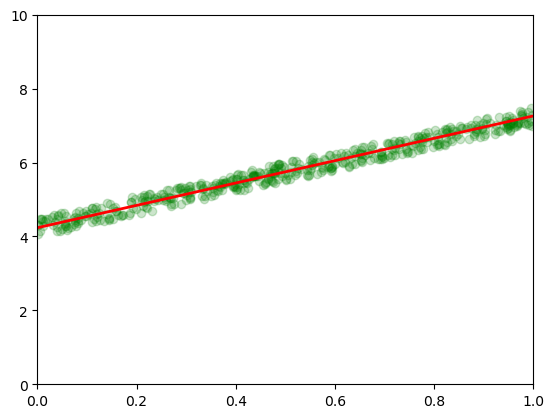

In [8]:
#create data
x = np.linspace(0,10,5)
plt.plot(x,4.23605824557858+3.025477575894945*x, color ='red', linewidth = 2)

plt.scatter(X,y, color = 'green', alpha = 0.2)
plt.axis([0,1,0,10])
plt.show()

# 2. GD  

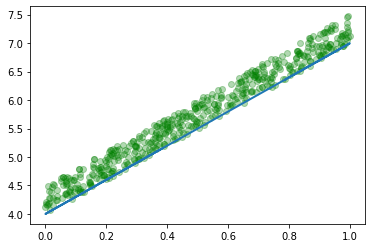

In [9]:
x = np.random.random(500)
y = 4 + 3*x + .5 * np.random.random(500)

%matplotlib inline
plt.scatter(x,y,alpha = 0.3, c = 'green')
plt.plot(x,4+3*x, linewidth =2 )
plt.axis('tight');

In [33]:
# bcs LR has bias so we have convert x to xbar: [1,x1...], and w=[w0,w1,...]
one = np.ones((x.shape[0],1))
Xbar = np.concatenate((one,x.reshape(-1,1)), axis = 1)
N = Xbar.shape[0]

w0 = np.array([[2,1]]).T

(500, 1)
(500, 1)


In [46]:
# grad
def grad(w):
    N = Xbar.shape[0]
    # bcs y.shape =(500,) so we convert y.reshape(-1,1) to calculate right (if not py use broadcasting)
    return 1/N * np.dot(Xbar.T,(np.dot(Xbar,w)-y.reshape(-1,1)))
#GDM
def GMD(w0,eta):
    # store value after update 
    list_w = [w0]
    for i in range(100):
        # GDM: w <- w + n*f'(w)
        w_new = list_w[-1] - eta * grad(list_w[-1])
        # GDM is vector so check so different vs GDU, we need calcute norm2/len 
        if np.linalg.norm(grad(w_new))/len(w_new) < 1e-3:
            break
        list_w.append(w_new)
    return (list_w,i)

w0 = np.array([[2,1]]).T
w_result, i = GMD(w0,1)
print(w_result[-1])

[[4.26444993]
 [2.97099466]]
